# Связь частотного и классического определений вероятности

**Условие**  
В урне находятся 5 красных и 7 синих шаров.  
Наугад извлекают **6 шаров без возвращения**.  
Событие $ A $: *среди извлечённых ровно 2 красных шара*.

**Требуется**  
а) вычислить классическую (теоретическую) вероятность $ P(A) $;  
б) смоделировать $ N $ опытов и вычислить частоту события $ A $;  
в) построить график зависимости частоты от $ N $;  
г) показать графически, как частота стремится к теоретической вероятности при увеличении $ N $.

Классическая вероятность P(A) = C(5,2)*C(7,4) / C(12,6) = 0.378788
Частота при N = 2000: 0.386500
Абсолютная погрешность: 0.007712


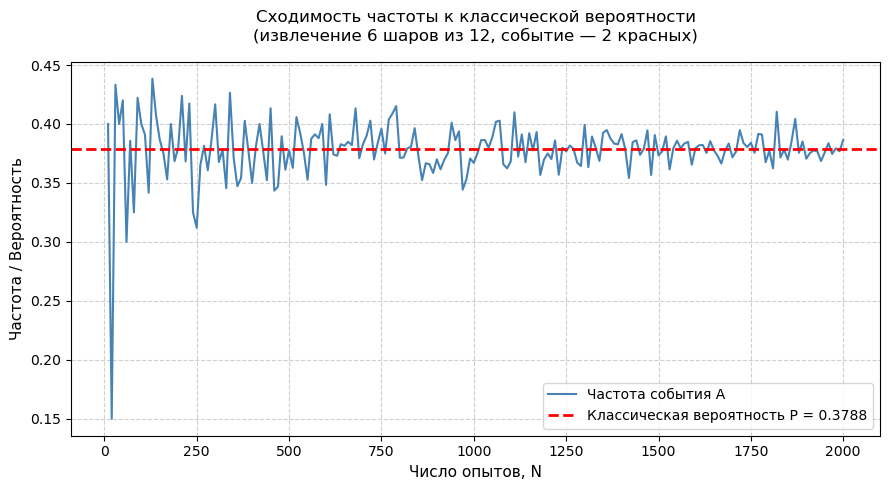

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

R, B = 5, 7  
n = 6          
k = 2         

# ТЕОРЕТИЧЕСКАЯ вероятность 
# P = C(R, k) * C(B, n-k) / C(R+B, n)
P_theory = comb(R, k) * comb(B, n - k) / comb(R + B, n)
print(f"Классическая вероятность P(A) = C(5,2)*C(7,4) / C(12,6) = {P_theory:.6f}")

# МОДЕЛИРОВАНИЕ
N_list = list(range(10, 2001, 10)) 
freq_list = []

urn = ['R'] * R + ['B'] * B

for N in N_list:
    count_A = 0
    for _ in range(N):
        drawn = np.random.choice(urn, size=n, replace=False)
        if np.sum(drawn == 'R') == k:
            count_A += 1
    freq_list.append(count_A / N)

print(f"Частота при N = {N_list[-1]}: {freq_list[-1]:.6f}")
print(f"Абсолютная погрешность: {abs(freq_list[-1] - P_theory):.6f}")

plt.figure(figsize=(9, 5))
plt.plot(N_list, freq_list, label='Частота события A', color='steelblue', linewidth=1.5)
plt.axhline(y=P_theory, color='red', linestyle='--', linewidth=2, 
            label=f'Классическая вероятность P = {P_theory:.4f}')

plt.title('Сходимость частоты к классической вероятности\n(извлечение 6 шаров из 12, событие — 2 красных)', 
          fontsize=12, pad=15)
plt.xlabel('Число опытов, N', fontsize=11)
plt.ylabel('Частота / Вероятность', fontsize=11)
plt.grid(True, alpha=0.6, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()